In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Armazena o csv como dataframe na variável.
mCost = pd.read_csv('./Datasets/Mall_Customers.csv')

In [6]:
#Imprime as cinco primeiras linhas do dataframe
mCost.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Permite analisar o tipo dos dados em cada colune + contar dados não nulos
mCost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
'''
dataframe.isnull() retorna um dataframe onde cada elemento é
do tipo boolean e diz se o elemento É NULO OU NÃO
'''
mCost.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
# dataframe.sum() retorna a soma de todos os elementos em cada coluna
# Se tratando de booleans, cada True é interpretado como o inteiro 1,
# e cada False como o inteiro 0
mCost.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [10]:
mCost.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# retorna Not a Number
np.nan

nan

In [12]:
# retorna uma amostra (Acho que em DataFrame) de itens 
# de um dataframe. 
# o tamanho da amostra é dado por `frac`
smpl = mCost.sample(frac = 0.1)

In [13]:
# retorna os indíces (TUPLA) de cada linha no dataframe
smpl.index

Int64Index([197,  95,  45,   7, 142, 165,  87,  96, 103,  59,  17,  85,  14,
             21,   4, 105,  56,  18, 188, 104],
           dtype='int64')

In [14]:
# adicionando valores nulos ...
plusNull = mCost.copy()
for col in plusNull.columns:
    ind = mCost.sample(frac = 0.1).index
    plusNull.loc[ind, col] = np.nan    
    # Aparentemente, `[ind, col]` é a mesma coisa
    # que chamar forEach i in `ind` e depois .loc(i, col)
    # poderíamos chamar dataframe.loc[ind, col], i e c sendo tuplas
    # que a biblioteca faria um "for each i in ind, for each c in col"
plusNull.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,NaN,77.0
4,5.0,Female,31.0,17.0,40.0


In [15]:
plusNull.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [16]:
# deleta as linhas onde haja valores nulos
plusNull.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
4,5.0,Female,31.0,17.0,40.0
5,6.0,Female,22.0,17.0,76.0
...,...,...,...,...,...
191,192.0,Female,32.0,103.0,69.0
192,193.0,Male,33.0,113.0,8.0
193,194.0,Female,38.0,113.0,91.0
196,197.0,Female,45.0,126.0,28.0


In [17]:
# Preenche os NaN com o inteiro 0
plusNull.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,0.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,0.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,74.0
198,199.0,0,0.0,137.0,18.0


In [18]:
# Retorna um dataframe com medidas estatísticas que descrevem
# cada coluna do dataframe original
mCost.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
plusNull.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,99.161111,38.616667,59.805556,50.138889
std,58.594255,13.579592,26.249575,26.372867
min,1.000000,18.000000,15.000000,1.000000
25%,48.750000,29.000000,40.000000,33.500000
50%,95.500000,36.000000,61.000000,50.000000
75%,151.250000,48.000000,77.250000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
esp = plusNull.mean()

In [21]:
# fillna pode receber um Dataframe e preencherá os
# valores nulos com os respectivos valores da coluna
# de mesmo nome
plusNull.fillna(esp)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.000000,15.000000,39.000000
1,2.0,Male,21.000000,15.000000,81.000000
2,3.0,Female,20.000000,16.000000,6.000000
3,4.0,Female,23.000000,59.805556,77.000000
4,5.0,Female,31.000000,17.000000,40.000000
...,...,...,...,...,...
195,196.0,Female,35.000000,120.000000,50.138889
196,197.0,Female,45.000000,126.000000,28.000000
197,198.0,Male,32.000000,126.000000,74.000000
198,199.0,NaN,38.616667,137.000000,18.000000


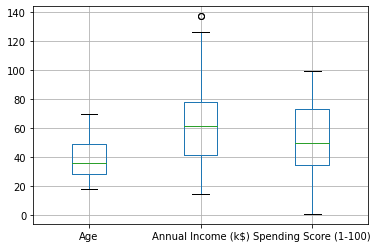

In [22]:
# O parametro column recebe uma lista de strings e procura 
# no dataframe uma coluna cujo nome é igual à cada string
bxplt = mCost.boxplot(column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
bxplt

In [27]:
# Vamos analisar a renda anual atraves do
# z-score (que indica quantos desvios-padrão de distância
# aquela variável está da média)
mean = mCost.describe().loc['mean','Annual Income (k$)']
stdDv = mCost.describe().loc['std', 'Annual Income (k$)']

z = ( mCost['Annual Income (k$)'].values - mean ) / stdDv
z = np.abs(z)

threshold = 2
result = np.where(z > threshold)

rendaAnualOutliers = mCost.iloc[result]

In [28]:
rendaAnualOutliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


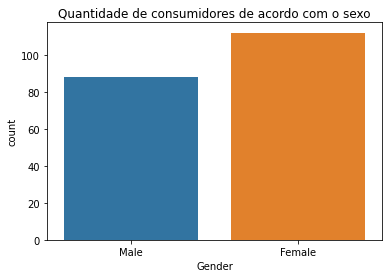

In [84]:
# Imprime um grafico de barras com uma label para o eixo x,
# utilizando o dataframe mCost
sns.countplot(x = 'Gender', data = mCost)
# Dá um título ao plot
plt.title('Quantidade de consumidores de acordo com o sexo');

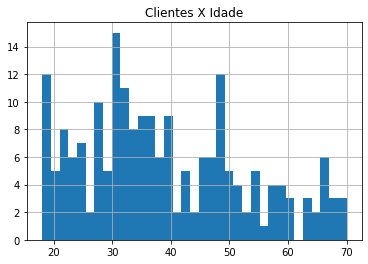

In [92]:
# Constroi um histograma em cima do dataframe, selecionando a
# coluna de dados e o número de classes a serem formadas
mCost.hist('Age', bins = 35)
plt.title('Clientes X Idade');

In [120]:
# .select_dtypes permite criar um dataframe apenas com as colunas
# cujos tipos foram selecionados, nesse caso: Strings, que são `objects`
genders = mCost.select_dtypes(include = ['object'])
# Cria um dicionário que mapeia Gender para Male ou Female e 
# male para 1 e female para 2
dicio = {'Gender' : {'Male' : 1, 'Female' : 2}}
print('dicionario: ', dicio, '\ntipo: ', str(type(dicio)))

dicionario:  {'Gender': {'Male': 1, 'Female': 2}} 
tipo:  <class 'dict'>


In [154]:
# Inicialmente, mCost['Gender '] é uma coluna de tipo
# OBJECT (nesse caso, uma str)
# Podemos transformar o tipo da coluna usando DataFram.astype()
# Pandas permite que você transforme str em um tipo chamado
# CATEGORY,que é útil para dados categóricos
genders = mCost['Gender'].astype('category')
genders

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: category
Categories (2, object): [Female, Male]

In [156]:
# Sabendo que agora nossos dados de genero sao categoricos
# podemos usar a função .cat.categories.tolist() para gerar
# uma lista (em ordem alfabetica) de todas as distintas categorias encontradas na série
genders = genders.cat.categories.tolist()
genders

['Female', 'Male']

In [158]:
#oh boy, here we go...

# zip(a, b) pega duas tuplas (a e b) e faz pares entre os elementos das tuplas
# de acordo com a posição do elemento: 1º elemento de a com 1º elemento de b etcetcetc

# ao chamar zip(genders, list(range(1, len(genders)+1))), estamos unindo 
# a tupla genders com a tupla (1, 2, 3, 4, ... , n- 1, n), onde n é o tamanho da
# primeira tupla

# novoDict é um dicionário que mapeia Gender para Female ou Male e Female para 1
# e male para 2
novoDict = {'Gender' : {k : v for k, v in zip(genders,list(range(1, len(genders)+1)))}}

In [162]:
mCostNorm = mCost.copy()
# Substitui de acordo com o mapa novoDict o nosso dataframe,
# sobrescrevendo os dados
mCostNorm.replace(novoDict, inplace = True)
mCostNorm

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,2,32,126,74
198,199,2,32,137,18


In [164]:
### Vamos fazer a mesma coisa agora só que com Label Encoding do PANDAS###

mCostNorm = mCost.copy()
# Passando a coluna para o tipo category
mCostNorm['Gender'] = pd.Categorical(mCostNorm['Gender'])
# Chamando cat.codes, podemos transformar os tipos categoricos
# de uma coluna em códigos gerados automaticamente pelo pandas

# (Aparentemente primeiro o pandas ordena os tipos das diferentes
# categorias em uma lista e depois dá um código de acordo com 
# o índice daquele tipo dentro da lista)
mCostNorm['Gender'] = mCostNorm['Gender'].cat.codes
mCostNorm

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [166]:
### Repetindo a mesma ação porém importanto o Label Enconding do SCIKITLEARN ###
from sklearn.preprocessing import LabelEncoder
lbEnc = LabelEncoder()

mCostNorm = mCost.copy()
mCostNorm['Gender'] = lbEnc.fit_transform(mCostNorm['Gender'])
mCostNorm


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


**ONE HOT ENCODING**

Ao utilizar o Label Encoding, o modelo pode acabar entendendo que uma das categorias
é mais importante que a outra por causa de um label maior.
Para evitar isso, utilizaremos o One Hot Encoding, que separa cada categoria em uma
coluna que diz se aquele índice na tabela original **está ou não** dentro da categoria.

Se antes havia uma coluna chamada Gender onde as opções eram Female(Label 0) e Male(Label 1),
agora haverá uma coluna Female e uma coluna Male nas quais as opções de preenchimento seguem o padrão
booleano True(Label 1) e False(Label 0)

Para aplicar o One Hot Encoding, chamamos `pd.get_dummies(DataFrame)`

In [ ]:
costOneHot = mCost.copy()
# Não é preciso transformar o tipo da coluna.
# costOneHot['Gender'] = mCost['Gender'].astype('category')
costOneHot = pd.get_dummies(costOneHot)
costOneHot

In [194]:
# Podemos fazer o One Hot Encoding com o sklearn tmb
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

costOneHot = mCost.copy()
costOneHot = OHE.fit_transform(costOneHot['Gender'].values.reshape(-1,1)).toarray()
costOneHot

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.